# Lab 3.4: Jointly Distributed Random Variables

## Outline
- Covariance
- Correlation 
- Independence
- Joint probability distribution
- Marginal probability distribution
- Conditional probability distribution

## Covariance

Covariance measures how much 2 random variables change together:
- **Covariance is positive when **
  - `random variable 1` has a high value when `random variable 2` has a high value
  - `random variable 1` has a low value when `random variable 2` has a low value

<br>

- **Covariance is negative when **
  - `random variable 1` has a low value when `random variable 2` has a high value, and vice versa

<br>

- **Covariance is 0 when **
  - `random variable 1` and `random variable 2` do not have any linear relationship


- Here is the case when covariance is positive

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

cov(x1, x2)

array([[ 666.66666667,   79.        ],
       [  79.        ,   30.33583333]])

By default, `numpy` returns a covariance matrix, and it has the following form

\begin{bmatrix}
    var(x1) & cov(x1, x2) \\
    cov(x1, x2) & var(x2)
\end{bmatrix}

So the covariance between `x1` and `x2` is 79

- Here is the case when covariance is negative

In [3]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the covariance between x1 and x2
cov(x1, x2)

array([[ 666.66666667,  -79.        ],
       [ -79.        ,   30.33583333]])

- Here is the case when covariance is 0

In [4]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the covariance between x1 and x2
cov(x1, x2)

array([[  4.66666667,   0.        ],
       [  0.        ,  14.        ]])

## Correlation

Correlation is convariance normalized by the standard deviations of the variables.

Therefore, the same rules of covariance apply to correlation, except correlation is bounded between -1 and 1.

Correlation provides a scaled measure of covariance so we can compare correlation across different datasets.

- Here is the case when correlation is positive

In [5]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

corrcoef(x1, x2)

array([[ 1.        ,  0.55551368],
       [ 0.55551368,  1.        ]])

Again `numpy` returns a correlation matrix, and it has the following form:

\begin{bmatrix}
    corr(x1, x1) & corr(x1, x2) \\
    corr(x2, x1) & corr(x2, x2)
\end{bmatrix}

The correlation of a variable with itself, i.e. $corr(x1, x1)$, is always 1.

- Here is the case when correlation is negative

In [6]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the correlation between x1 and x2
corrcoef(x1, x2)

array([[ 1.        , -0.55551368],
       [-0.55551368,  1.        ]])

- Here is the case when correlation is zero / undefined

In [7]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the correlation between x1 and x2
corrcoef(x1, x2)

array([[ 1.,  0.],
       [ 0.,  1.]])

## Independence


### Continuous Random Variables

If two random variables are correlated, then they are dependent.

**However if two random variables are not correlated, it does not mean they are independent.**

**Correlation describes linear dependencies between random variables, dependency can be described by other types of relationships**

- The example below demonstrates the idea

corr(x1, x2): 0.0


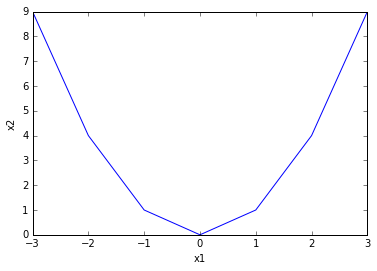

In [8]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

print('corr(x1, x2):', corrcoef(x1, x2)[0,1])

plot(x1, x2)
xlabel('x1')
ylabel('x2');

$x_1$ and $x_2$ are clearly dependent, but since the relationship is perfectly quadratic, the correlation is 0.

### Discrete Random Variables


**Independence can be estalished by:**

$$p(x, y) = p(x) \times p(y)$$

Say we want to find out if being in Class A or Class B affects one chances of going to college and the data is given below.

|   | Success | Fail |
|---|---------|------|
| A | 20      | 34   |
| B | 15      | 12   |

In [9]:
total = ((20 + 34) + (15 + 12))
p_a = (20 + 34) / total
p_success = (20 + 15) / total
p_a_and_success = 20 / total
print('p(a) * p(success):', p_a * p_success)
print('p(a and success):', p_a_and_success)

p(a) * p(success): 0.28806584362139914
p(a and success): 0.24691358024691357


**Question**: Is getting into college independent of the two classes?

No, because p(a)p(success) does not equal p(a and success). 

## Joint / marginal / conditional probability distribution

Joint / marginal / conditional distributions are useful for comparing **trends across different groups** in a dataset. 

Here we illustate how to use these techniques to conduct a **market segmentation analysis**.

- First we read in the data

In [10]:
import pandas as pd

pd.set_option('display.precision', 3)

sales_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/gender_product_segmentation.csv', 
                         index_col=0)
sales_data

,Product 1,Product 2,Product 3,Product 4
Male,321,857,404,766
Female,65,471,443,192


-  We get the sum of the rows and sum of the columns

In [11]:
col_sum = sales_data.sum(axis=0)

row_sum = sales_data.sum(axis=1)

total_sum = row_sum[0] + row_sum[1]


print('----- Row sums ----')
print(row_sum)
print() 
print('----- Col sums -----')
print(col_sum)
print() 
print('----- Total sum ----')
print(total_sum)

----- Row sums ----
Male      2348
Female    1171
dtype: int64

----- Col sums -----
Product 1     386
Product 2    1328
Product 3     847
Product 4     958
dtype: int64

----- Total sum ----
3519


## Joint probabilities

- To compute the joint probability, we divide each cell by the `total_sum`

In [12]:
# Compute the joint probability and name is 'sales_joint'
# sales_joint should have the same dimension as the original data table
sales_joint = sales_data.copy()

sales_joint['Product 1'] = sales_joint['Product 1'].apply(lambda x: x/total_sum)
sales_joint['Product 2'] = sales_joint['Product 2'].apply(lambda x: x/total_sum)
sales_joint['Product 3'] = sales_joint['Product 3'].apply(lambda x: x/total_sum)
sales_joint['Product 4'] = sales_joint['Product 4'].apply(lambda x: x/total_sum)

sales_joint

,Product 1,Product 2,Product 3,Product 4
Male,0.091,0.244,0.115,0.218
Female,0.018,0.134,0.126,0.055


- To be explicit, the joint probabilities are:

$$P(\text{Product 1} \cap \text{Male}) = 0.09$$
$$P(\text{Product 2} \cap \text{Male}) = 0.24$$
$$P(\text{Product 3} \cap \text{Male}) = 0.11$$
$$P(\text{Product 4} \cap \text{Male}) = 0.22$$


$$P(\text{Product 1} \cap \text{Female}) = 0.02$$
$$P(\text{Product 2} \cap \text{Female}) = 0.13$$
$$P(\text{Product 3} \cap \text{Female}) = 0.13$$
$$P(\text{Product 4} \cap \text{Female}) = 0.05$$

- Now let's visualize the joint probability distribution

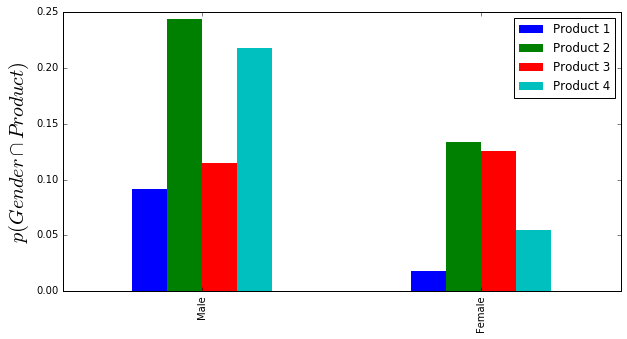

In [13]:
sales_joint.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Gender \cap Product)$', fontsize=20);

Just by looking at the joint probability alone, it is tempting to conclude:
- Male buyers prefer **Product 2, 4**
- Female buyers prefer **Product 2, 3**

Let's also look at the marginal probabilities as well.

##Marginal Probabilities

A marginal probability is the sum of joint probabilities over the category of interest.

Say we are interested in gender, the marginal probabilities here would be (`row sum / total sum`)

In [14]:
# Compute and print the marginal probabilities for gender

marginal_prob_male = row_sum[0]/total_sum
marginal_prob_female = row_sum[1]/total_sum
print("Male marginal probability:", marginal_prob_male*100,"% | Female marginal probability:", marginal_prob_female*100,"%")

Male marginal probability: 66.7235009946 % | Female marginal probability: 33.2764990054 %


There are twice as much male buyers compared to female buyers

Since we are dividing each cell with the total count when we are calculating joint probabilities, we are not taking into account the skewed distribution of buyers of different genders

**We need to take into account the fact that there are more male buyers**, and we turn to conditional probabilities for that.

## Conditional Probabilities

Conditional probability is computed by considering each group of interest individually.

We could look at female buyers as if there are no male buyers and only examine the female buyers' behavior. 

And the same applies to male buyers.

To compute a conditional probability, we divide the row by the row sum of that corresponding row.

In [15]:
male_sum = row_sum[0]
female_sum = row_sum[1]

sales_data_conditional = sales_data.copy()
sales_data_conditional.ix['Male'] = sales_data.ix['Male'] / male_sum
# Compute the conditional distribution of buyers' behavior for female buyers
sales_data_conditional.ix['Female'] = sales_data.ix['Female'] / female_sum

sales_data_conditional

,Product 1,Product 2,Product 3,Product 4
Male,0.137,0.365,0.172,0.326
Female,0.056,0.402,0.378,0.164


- Now let's visualize the conditional probability distribution

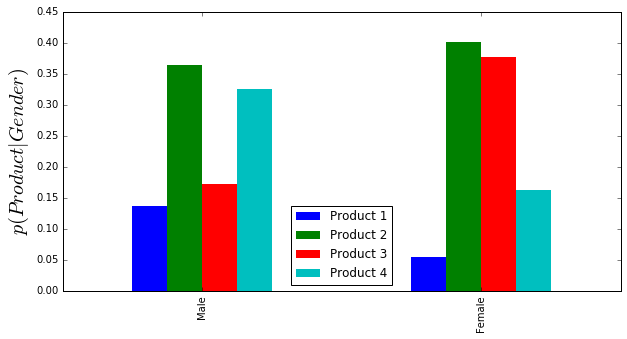

In [16]:
sales_data_conditional.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Product | Gender)$', fontsize=20);

Now we are treating female and male buyers equally regardless of the number of buyer for each gender

We can conclude:
- Male buyers prefer **Product 2,4**
- Female buyers prefer **Product 2,3**

## Exercises

**Question 1**
- Read in the file https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv and complete the following tasks:
   - Implement a function to calculate covariance (does not need to be in matrix form)
   - Implement a function to calcualte correlation (does not need to be in matrix form)
   - Identify the variable that is the most correlated with `gpa`

In [17]:
admissions_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv')
admissions_data.head()

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61
3,53759.0,3.39,62
4,50952.0,3.10,45


In [18]:
def cov_dataframe(var1, var2):
    
    varX_mean = var1.mean()
    varY_mean = var2.mean()
    varXY = var1 * var2
    varXY_mean = varXY.mean()
    cov = varXY_mean - varX_mean * varY_mean
    
    return cov

In [19]:
cov_dataframe(admissions_data['gpa'], admissions_data['family_income'])

4014.9337921708066

In [20]:
cov_dataframe(admissions_data['gpa'], admissions_data['parent_avg_age'])

-0.028782641179986967

In [21]:
cov_dataframe(admissions_data['family_income'], admissions_data['parent_avg_age'])

-1226.2147143881302

In [22]:
def corr_dataframe(var1, var2):
    
    covar = cov_dataframe(var1, var2)
    
    varX_std = var1.std()
    varY_std = var2.std()
    varXY_corr = covar/(varX_std * varY_std)
    
    return varXY_corr

In [23]:
corr_dataframe(admissions_data['gpa'], admissions_data['family_income'])

0.7422018620570715

In [24]:
corr_dataframe(admissions_data['gpa'], admissions_data['parent_avg_age'])

-0.009134022918898116

In [25]:
corr_dataframe(admissions_data['family_income'], admissions_data['parent_avg_age'])

-0.006322473030974657

**Question 2**
- Is `gpa` independent of the `family_income`? Why or why not?

No because their correlation is very high: 0.74. Besides, their covariance is not 0.

**Question 3**
- By categorizing the `gpa` into low/medium/high and `family_income` into `low/medium/high` (choose cut-off values that make sense to you), compute the conditional probability distributions and conduct analysis about how `family_income` affects `gpa`.

In [26]:
admissions_category = pd.DataFrame(columns=['gpa_high', 'gpa_medium', 'gpa_low'],index=['high_income','medium_income','low_income'])

In [27]:
admissions_category

,gpa_high,gpa_medium,gpa_low
high_income,NaN,NaN,NaN
medium_income,NaN,NaN,NaN
low_income,NaN,NaN,NaN


# Making gpa thresolds as follows:

high: more than 3

medium: between 3 and 2.5 (both ends included)

low: below 2.5

# Making income thresolds as follows:

high: more than $\$$60,000

medium: between $\$60,000$ and $\$$30,000 (both ends included)

low: below $\$$30,000

In [28]:
len(admissions_data)

10992

In [29]:
a = admissions_data[(admissions_data['gpa'] > 3.0) & (admissions_data['family_income'] > 60000)].count()
b = admissions_data[(admissions_data['gpa'] > 3.0) & (admissions_data['family_income'] <= 60000) & (admissions_data['family_income'] >= 30000)].count()
c = admissions_data[(admissions_data['gpa'] > 3.0) & (admissions_data['family_income'] < 30000)].count()
d = admissions_data[(admissions_data['gpa'] >= 2.5) & (admissions_data['gpa'] <= 3) & (admissions_data['family_income'] > 60000)].count()
e = admissions_data[(admissions_data['gpa'] >= 2.5) & (admissions_data['gpa'] <= 3) & (admissions_data['family_income'] <= 60000) & (admissions_data['family_income'] >= 30000)].count()
f = admissions_data[(admissions_data['gpa'] >= 2.5) & (admissions_data['gpa'] <= 3) & (admissions_data['family_income'] < 30000)].count()
g = admissions_data[(admissions_data['gpa'] < 2.5) & (admissions_data['family_income'] > 60000)].count()
h = admissions_data[(admissions_data['gpa'] < 2.5) & (admissions_data['family_income'] <= 60000) & (admissions_data['family_income'] >= 30000)].count()
i = admissions_data[(admissions_data['gpa'] < 2.5) & (admissions_data['family_income'] < 30000)].count()

In [30]:
admissions_category['gpa_high'] = [a[0],b[0],c[0]]
admissions_category['gpa_medium'] = [d[0],e[0],f[0]]
admissions_category['gpa_low'] = [g[0],h[0],i[0]]

In [31]:
admissions_category

,gpa_high,gpa_medium,gpa_low
high_income,1562,0,0
medium_income,3233,2630,0
low_income,548,2535,484


In [32]:
admissions_category.sum().sum()

10992

In [33]:
# Conditional probability distributions. P(GPA | Income)

row_admissions_sum = admissions_category.sum(axis=1)

total_admissions_sum = row_admissions_sum[0] + row_admissions_sum[1] + row_admissions_sum[2]

high_income_sum = row_admissions_sum[0]
medium_income_sum = row_admissions_sum[1]
low_income_sum = row_admissions_sum[2]

admissions_category_conditional = admissions_category.copy()
admissions_category_conditional.ix['high_income'] = admissions_category.ix['high_income'] / high_income_sum
admissions_category_conditional.ix['medium_income'] = admissions_category.ix['medium_income'] / medium_income_sum
admissions_category_conditional.ix['low_income'] = admissions_category.ix['low_income'] / low_income_sum

admissions_category_conditional

,gpa_high,gpa_medium,gpa_low
high_income,1.000,0.000,0.000
medium_income,0.551,0.449,0.000
low_income,0.154,0.711,0.136


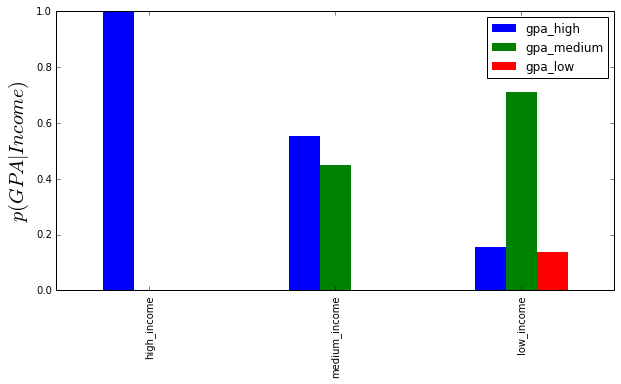

In [34]:
# Visualize above
admissions_category_conditional.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(GPA | Income)$', fontsize=20);

We can conclude that:

* Families with high income (more than $\$60,000$) result in higher GPA's (above 3.0).

* Families with low income (less than $\$30,000$) result in medium GPA's (between 3.0 and 2.5), and show that very low GPA's (less than 2.5) is less than 20%.

* In fact, families with medium income (between $\$60,000$ and $\$30,000$) show less disparity between high and medium GPA's compared to the other 2 income thresolds, BUT showing less impact on medium GPA's compared to low income families.